<a href="https://colab.research.google.com/github/muppiit/PengolahanCitra_dan_VisiKomputer/blob/main/Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

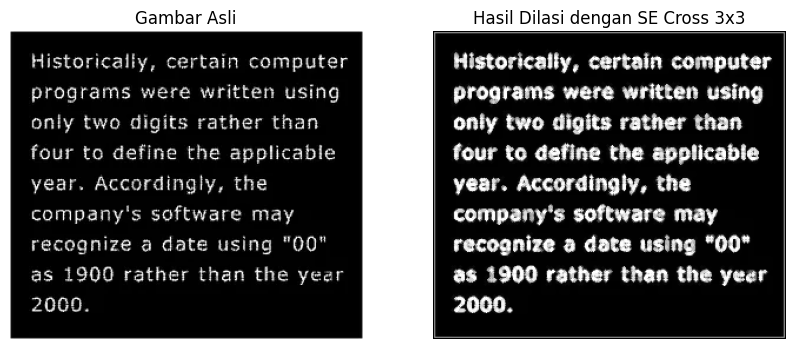

In [3]:
# Fungsi dilasi dengan Structuring Element cross 3x3
def dilate_cross(image):
    # Ukuran gambar
    rows, cols = image.shape

    # Buat array output dengan nilai awal 0
    output_image = np.zeros((rows, cols), dtype=np.uint8)

    # Structuring Element berbentuk cross
    SE = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

    # Iterasi melalui setiap piksel (kecuali batas)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Ambil neighborhood sesuai ukuran SE (3x3)
            region = image[i-1:i+2, j-1:j+2]

            # Terapkan operasi dilasi
            max_value = np.max(region * SE)

            # Set hasil dilasi pada piksel output
            output_image[i, j] = max_value

    return output_image

# Baca citra grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/morphology.png', cv2.IMREAD_GRAYSCALE)

# Terapkan fungsi dilasi
dilated_image = dilate_cross(image)

# Tampilkan gambar asli dan hasil dilasi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

# Hasil dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title("Hasil Dilasi dengan SE Cross 3x3")
plt.axis("off")

plt.show()

Structuring Element Cross 3x3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]


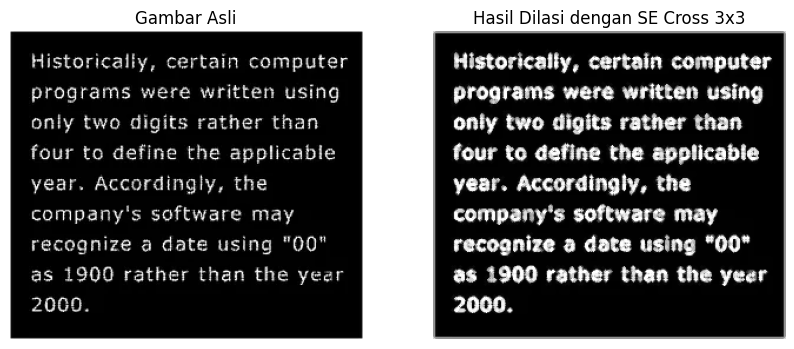

In [4]:
SE_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print("Structuring Element Cross 3x3:")
print(SE_cross)

# Terapkan operasi dilasi
dilated_image = cv2.dilate(image, SE_cross)

# Tampilkan gambar asli dan hasil dilasi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

# Hasil dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title("Hasil Dilasi dengan SE Cross 3x3")
plt.axis("off")

plt.show()

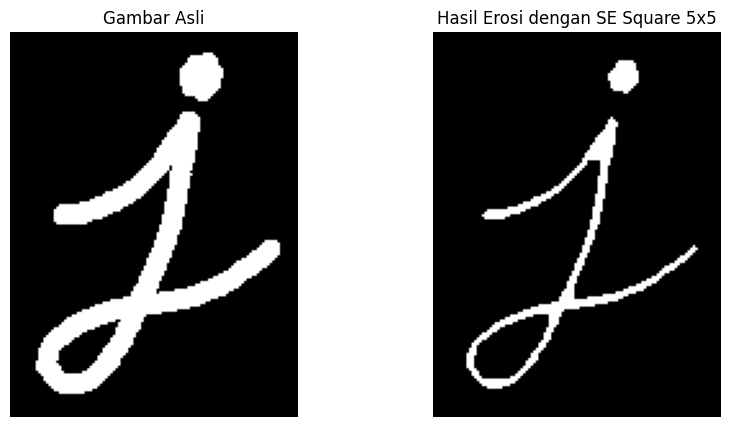

In [5]:
def erode_square(image):
    # Ukuran gambar
    rows, cols = image.shape

    # Buat array output dengan nilai awal 0
    output_image = np.zeros((rows, cols), dtype=np.uint8)

    # Structuring Element berbentuk square 5x5
    SE_size = 5
    SE = np.ones((SE_size, SE_size), dtype=np.uint8)
    pad = SE_size // 2

    # Iterasi melalui setiap piksel (kecuali batas yang tidak bisa di-erosi)
    for i in range(pad, rows - pad):
        for j in range(pad, cols - pad):
            # Ambil neighborhood sesuai ukuran SE (5x5)
            region = image[i-pad:i+pad+1, j-pad:j+pad+1]

            # Terapkan operasi erosi
            min_value = np.min(region[SE == 1])

            # Set hasil erosi pada piksel output
            output_image[i, j] = min_value

    return output_image

# Baca citra grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Terapkan fungsi erosi
eroded_image = erode_square(image)

# Tampilkan gambar asli dan hasil erosi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

# Hasil erosi
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title("Hasil Erosi dengan SE Square 5x5")
plt.axis("off")

plt.show()

Structuring Element Square 5x5:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


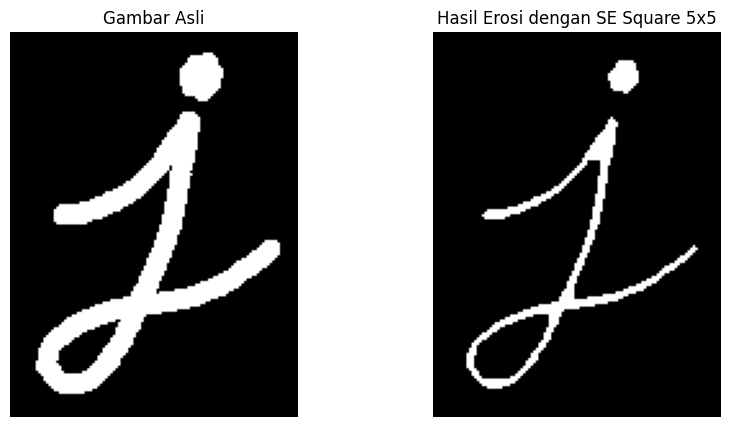

In [6]:
# Buat Structuring Element berbentuk square 5x5
SE_square = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
print("Structuring Element Square 5x5:")
print(SE_square)

# Terapkan operasi erosi
eroded_image = cv2.erode(image, SE_square)

# Tampilkan gambar asli dan hasil erosi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

# Hasil erosi
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title("Hasil Erosi dengan SE Square 5x5")
plt.axis("off")

plt.show()

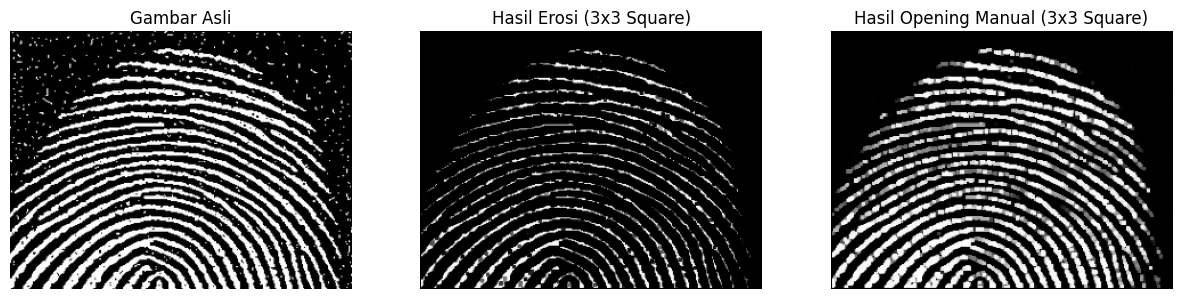

In [7]:
# Fungsi erosi dengan Structuring Element square 3x3
def erode_square(image):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    SE_size = 3
    SE = np.ones((SE_size, SE_size), dtype=np.uint8)
    pad = SE_size // 2

    # Erosi
    for i in range(pad, rows - pad):
        for j in range(pad, cols - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            min_value = np.min(region[SE == 1])
            output_image[i, j] = min_value
    return output_image

# Fungsi dilasi dengan Structuring Element square 3x3
def dilate_square(image):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    SE_size = 3
    SE = np.ones((SE_size, SE_size), dtype=np.uint8)
    pad = SE_size // 2

    # Dilasi
    for i in range(pad, rows - pad):
        for j in range(pad, cols - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            max_value = np.max(region[SE == 1])
            output_image[i, j] = max_value
    return output_image

# Fungsi opening: erosi lalu dilasi
def opening_manual(image):
    eroded_image = erode_square(image)
    opened_image = dilate_square(eroded_image)
    return opened_image

# Baca citra grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Gambar hasil Erosi
img_erosion = erode_square(image)

# Terapkan operasi opening manual
opened_image_manual = opening_manual(image)


# Tampilkan gambar asli dan hasil opening manual
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_erosion, cmap='gray')
plt.title("Hasil Erosi (3x3 Square)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(opened_image_manual, cmap='gray')
plt.title("Hasil Opening Manual (3x3 Square)")
plt.axis("off")

plt.show()

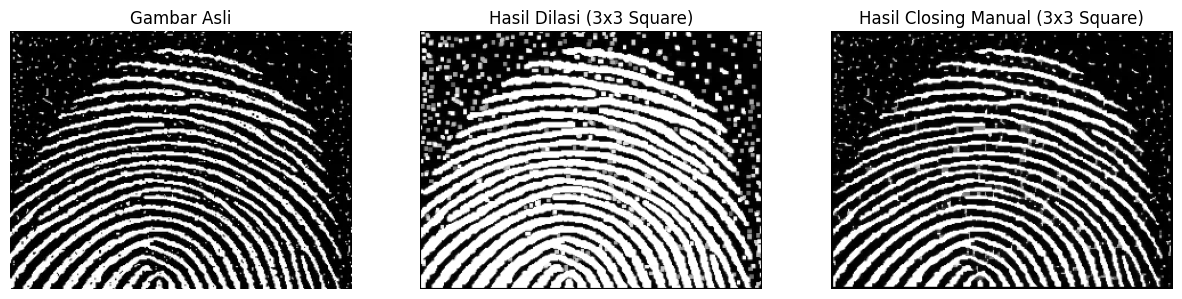

In [8]:
# Fungsi closing: dilasi lalu erosi
def closing_manual(image):
    dilated_image = dilate_square(image)
    closed_image = erode_square(dilated_image)
    return dilated_image, closed_image


# Terapkan operasi closing manual
dilated_image_manual, closed_image_manual = closing_manual(image)

# Tampilkan gambar asli, hasil dilasi, dan hasil closing manual
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

# Hasil dilasi
plt.subplot(1, 3, 2)
plt.imshow(dilated_image_manual, cmap='gray')
plt.title("Hasil Dilasi (3x3 Square)")
plt.axis("off")

# Hasil closing
plt.subplot(1, 3, 3)
plt.imshow(closed_image_manual, cmap='gray')
plt.title("Hasil Closing Manual (3x3 Square)")
plt.axis("off")

plt.show()

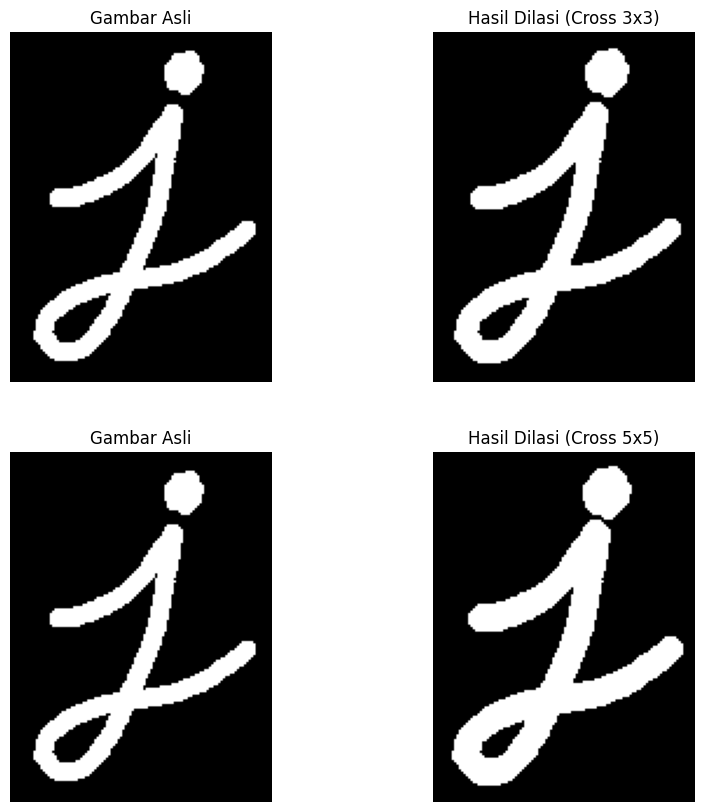

In [9]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Structuring Element berbentuk cross 3x3 dan 5x5
SE_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
SE_cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Terapkan operasi dilasi dengan Cross 3x3
dilated_image_3x3 = cv2.dilate(image, SE_cross_3x3)

# Terapkan operasi dilasi dengan Cross 5x5
dilated_image_5x5 = cv2.dilate(image, SE_cross_5x5)

# Tampilkan gambar asli, hasil dilasi 3x3, dan hasil dilasi 5x5
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title("Hasil Dilasi (Cross 3x3)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title("Hasil Dilasi (Cross 5x5)")
plt.axis("off")

plt.show()

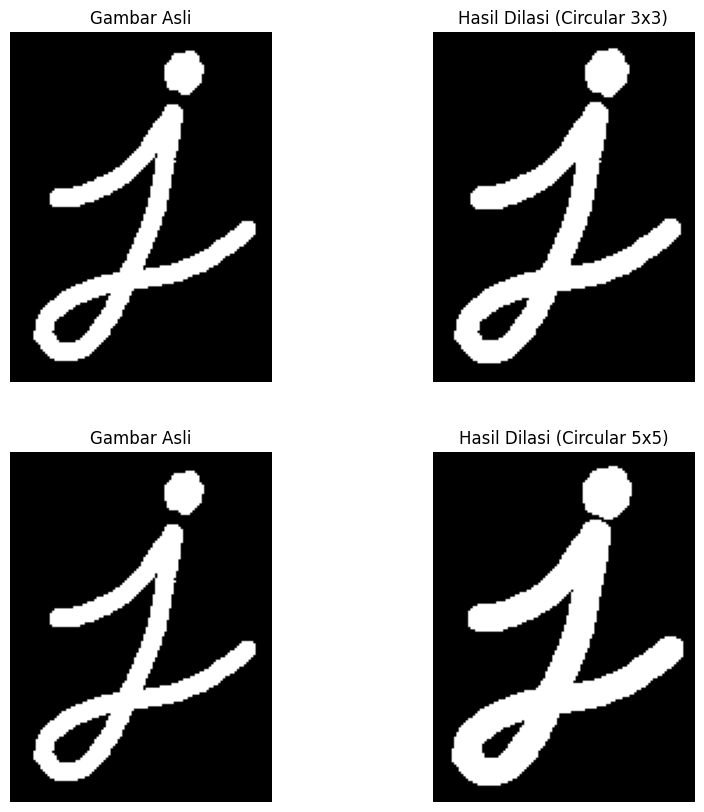

In [10]:
# Structuring Element berbentuk circular 3x3 dan 5x5
SE_circular_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
SE_circular_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Terapkan operasi dilasi dengan Circular 3x3
dilated_image_3x3 = cv2.dilate(image, SE_circular_3x3)

# Terapkan operasi dilasi dengan Circular 5x5
dilated_image_5x5 = cv2.dilate(image, SE_circular_5x5)

# Tampilkan gambar asli, hasil dilasi 3x3, dan hasil dilasi 5x5
plt.figure(figsize=(10, 10))

# Gambar asli (kiri atas)
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

# Hasil dilasi Circular 3x3 (kanan atas)
plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title("Hasil Dilasi (Circular 3x3)")
plt.axis("off")

# Gambar asli (kiri bawah)
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

# Hasil dilasi Circular 5x5 (kanan bawah)
plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title("Hasil Dilasi (Circular 5x5)")
plt.axis("off")

plt.show()


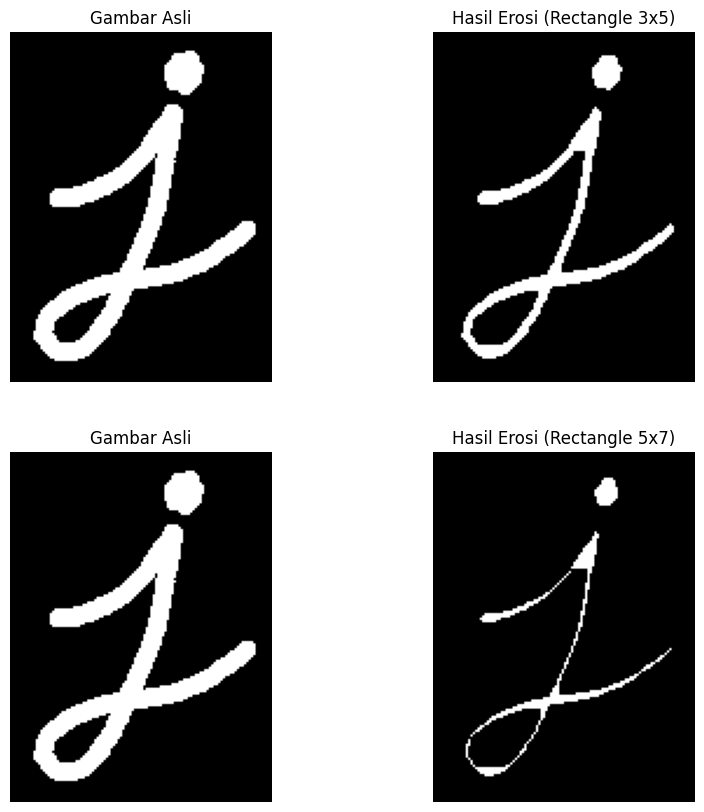

In [11]:
# Structuring Element berbentuk rectangle 3x5 dan 5x7
SE_rectangle_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
SE_rectangle_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 5))

# Terapkan operasi erosi dengan Rectangle 3x5
eroded_image_3x5 = cv2.erode(image, SE_rectangle_3x5)

# Terapkan operasi erosi dengan Rectangle 5x7
eroded_image_5x7 = cv2.erode(image, SE_rectangle_5x7)

# Tampilkan gambar asli, hasil erosi 3x5, dan hasil erosi 5x7
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(eroded_image_3x5, cmap='gray')
plt.title("Hasil Erosi (Rectangle 3x5)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(eroded_image_5x7, cmap='gray')
plt.title("Hasil Erosi (Rectangle 5x7)")
plt.axis("off")

plt.show()

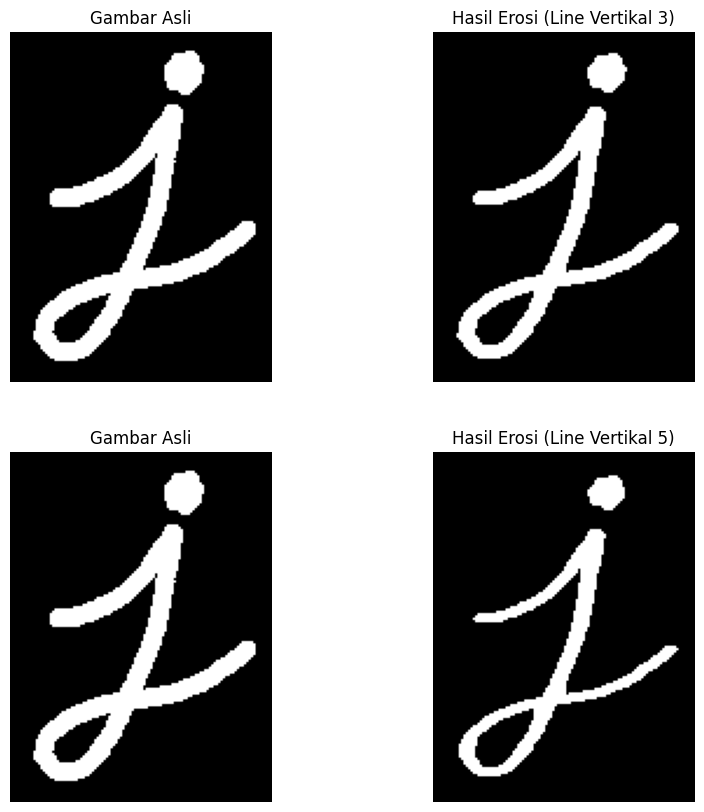

In [12]:
# Structuring Element berbentuk line vertikal 3 dan 5 menggunakan np.ones
SE_line_vertical_3 = np.ones((3, 1), dtype=np.uint8)
SE_line_vertical_5 = np.ones((5, 1), dtype=np.uint8)

# Terapkan operasi erosi dengan Line Vertikal 3
eroded_image_vertical_3 = cv2.erode(image, SE_line_vertical_3)

# Terapkan operasi erosi dengan Line Vertikal 5
eroded_image_vertical_5 = cv2.erode(image, SE_line_vertical_5)

# Tampilkan gambar asli, hasil erosi 3, dan hasil erosi 5
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(eroded_image_vertical_3, cmap='gray')
plt.title("Hasil Erosi (Line Vertikal 3)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(eroded_image_vertical_5, cmap='gray')
plt.title("Hasil Erosi (Line Vertikal 5)")
plt.axis("off")

plt.show()